# Importing Libraries

In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

# Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MicrosoftStock.csv to MicrosoftStock.csv


In [ ]:
microsoft = pd.read_csv('MicrosoftStock.csv', usecols=lambda col: col != 'index')
print(microsoft.head())

         date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [ ]:
microsoft.shape

(1259, 7)

In [ ]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [ ]:
microsoft.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


# Exploratory Data Analysis

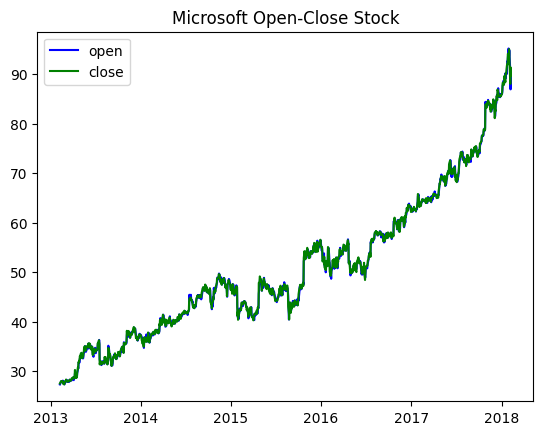

In [ ]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

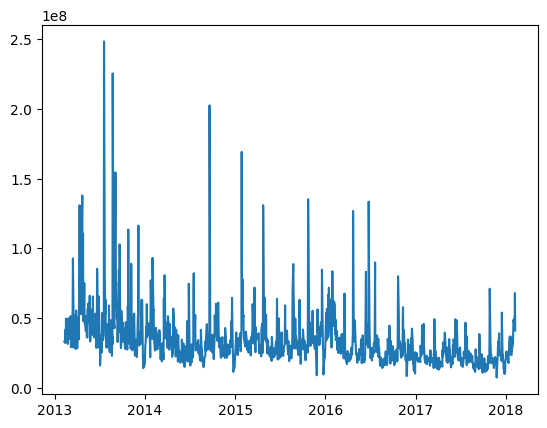

In [ ]:
plt.plot(microsoft['date'],
         microsoft['volume'])
plt.show()

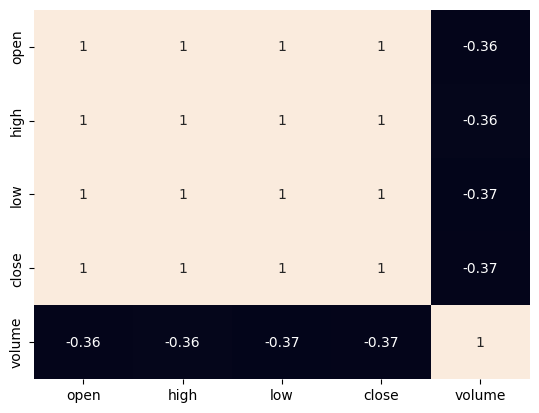

In [ ]:
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(),
			annot=True,
			cbar=False)
plt.show()

Close prices of Microsoft Stock for the time period of 2013 to 2018 which is for a span of 5 years-Plot

Text(0.5, 1.0, 'Microsoft Stock Prices')

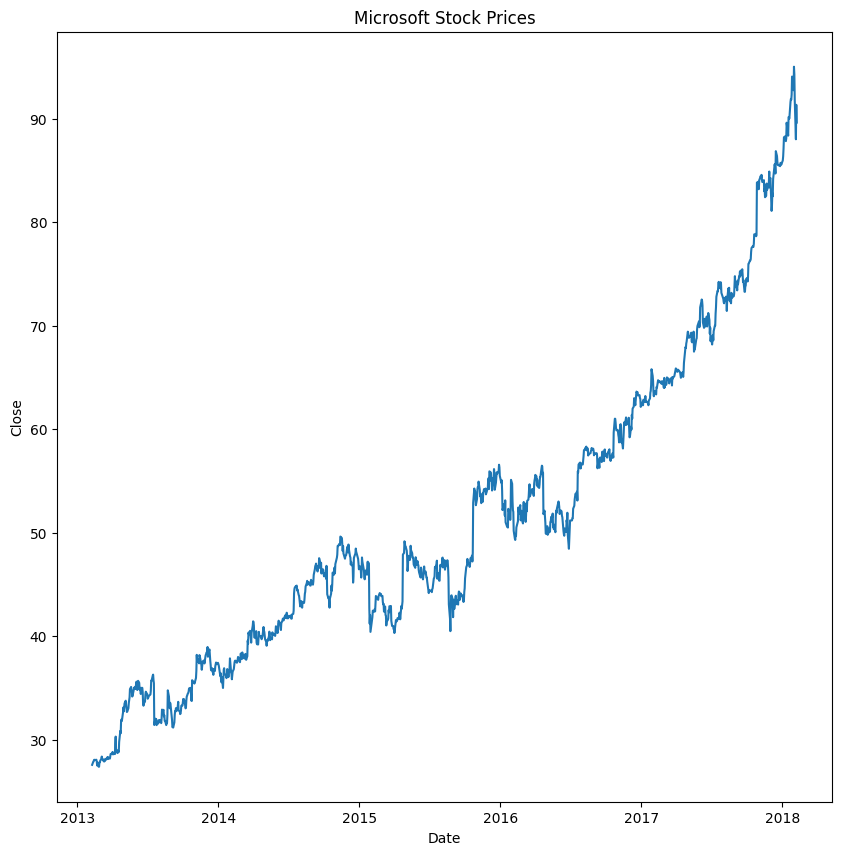

In [ ]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1, 1))
                            & (microsoft['date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

# Build the Model

In [ ]:
# prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * .95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare test data
test_data = ss[int(training) - 60:, :]  # include previous 60 points for lookback

x_test = []
y_test = dataset[int(training):, 0]  # actual unscaled close prices for test

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.1302
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0279
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0210
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0175
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0178
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0150
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0138
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0142
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0149
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0122
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0113
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0116
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0113
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0130
Epoch 15/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.01

# Make predictions

In [ ]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step


# Inverse scale predictions and calculate error:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit scaler only on training data (to inverse transform)
scaler = StandardScaler()
scaler.fit(dataset[0:int(training)])

predictions = predictions.reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = y_test.reshape(-1, 1)  # already unscaled

mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 44.92789255717203
Root Mean Squared Error (RMSE): 6.702827206274382


# Plot actual vs predicted prices

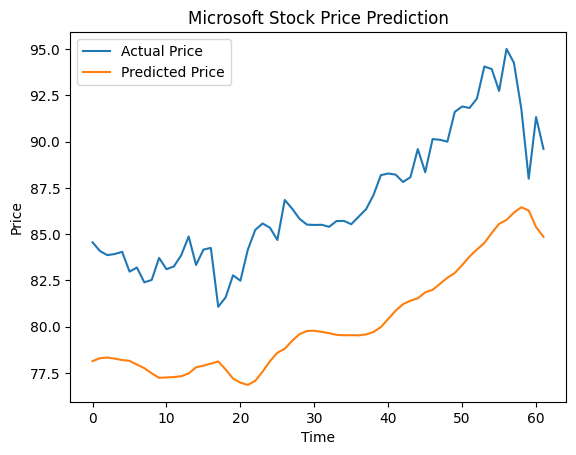

In [ ]:
import matplotlib.pyplot as plt

plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("Microsoft Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Compile and Fit

In [ ]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
            loss='mae',
            metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train,
					epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.3185 - root_mean_squared_error: 0.4419
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.1153 - root_mean_squared_error: 0.1543
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.1035 - root_mean_squared_error: 0.1385
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0966 - root_mean_squared_error: 0.1323
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0967 - root_mean_squared_error: 0.1302
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0904 - root_mean_squared_error: 0.1228
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0837 - root_mean_squared_error: 0.1113
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0818 - root_mean_squared_error: 0.1105
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0868 - root_mean_squared_error: 0.1179
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0847 - root_mean_squared_error: 0.11

# Model Evaluation

In [ ]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  Plot the known data and the predicted price trends in the Microsoft Stock prices and see whether they align with the previous trends or totally different from them

<ipython-input-36-54001d586147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


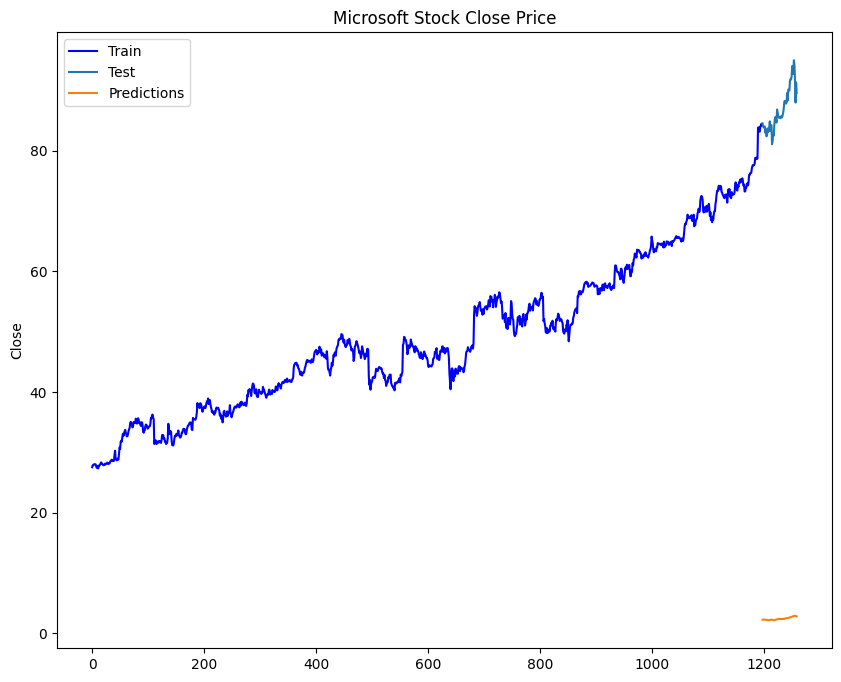

In [ ]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])